# How the intersubject activity evolves across levels

--- 

Q: How is the intersubject similarity is evolving across levels? If we pick a certain region, for a given subject, is the intersubject similarity higher or lower across levels? 

*One prediction*: if the region is involved in theory updating and learning then we expect a higher similarity for higher levels. As they learn more about the games (i.e. practice) subjects should converge to more similar voxel activation patterns. 

--- 


<img src="http://drive.google.com/uc?export=view&id=1aJrScYoDMPCpz__QT3cXItb4GSyEzb2Z" style="height:400px"/>





Task 2.1: Separate the betas as specified in notes and do a ISC between the respective vectors. Plot 9 brain maps & take the highest voxels.

Task 2.2: Get ROIs from my own data + momchils results and do the same analysis for these ROIs.
I want to make a plot like the one below (note: this is averaged across games and across subjects). One hypothesis is that over time (over levels) peoples representations become more similar (displayed by a larger ISC). In Bayesian terms, people start off with different priors but their posteriors will converge because they get more data. 
Caveat: this may not be the case, it may in fact be the opposite. 
APPROACH: pick the top ROI’s == the peak voxels. 
Take the voxels indicating ROI’s from momchils results (picture below) to test - Caveat: these are MNI coordinates! (so have to transform between voxel space and MNI space) [40.00]
1) for which of those voxels is the ISC significant across subjects
Smooth betas makes the voxels in the same neighbourhood more similar. Searchlight analysis: r = 2.6 voxels (4 mm); 4 voxels (6 mm); 6.6 voxels (10 mm)

In [34]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os 
import glob
import time
from copy import deepcopy
import numpy as np
import pandas as pd 

from nilearn import datasets, image
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

from brainiak import image, io
from brainiak.isc import isc, isfc, permutation_isc
from brainiak.isc import compute_summary_statistic
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns 
import pandas as pd
from importlib import reload 
import scipy.io as sio
from scipy import stats

# import own functions
import utils
reload(utils)

#%autosave 30
%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

In [21]:
# specify local path
path = '/Users/Daphne/data/'

# load relevant data
levels_betas = np.load(path+'bold_data_levels.npy')

# load mask and get voxel coordinates
mask_arr = np.load(path+'mask_arr.npy') # all masks are the same
mask_mat = mask_arr[0] # so we can pick any one from the array
coords_mat = np.array(np.where(mask_mat == 1)) # so need one set of voxel coordinates for all
coords_mat[[0, 2]] = coords_mat[[2, 0]] # exchange the rows

# mask_nii is the functional mask, this selects the brain voxels
mask_nii = nib.load(os.path.join(path, 'mask.nii')) 

# we get the brain mask (boolean array) with the .dataobj method
brain_mask = np.array(mask_nii.dataobj)

# Get the list of nonzero voxel coordinates from the nii mask
coords_nii = np.where(brain_mask)

# this where we plot our mask ON (sometimes called brain_nii) - the anatomical/structural image
mean_nii = nib.load(os.path.join(path, 'mean.nii')) 

# Uncomment to sanity check (takes long to load)

In [26]:
#df_levels_betas = pd.read_csv(path+'ordered_betas_df_levels.c
# game_names = df_levels_betas['game'].values
# game_levels = df_levels_betas['level'].values

# print(game_names[0:9])
# print(game_levels[0:9])
# print(len(game_levels))

In [8]:
# get every 1st item (all levels 1)
# game_levels[0::9]

In [9]:
# game_names[0::9]

```Python

for each [54, voxels] betas data

# take the 1 st item and put together 
# take the 2nd item and append to something
# .... to the 9th item and append

# want: [54, voxels] --> [6 (games), 9 (levels)]

```

In [24]:
# take one subject 
s = 0

levels_betas_sub = levels_betas[:,:,s]

In [27]:
levels_betas.shape

(54, 220075, 8)

In [28]:
levels_betas_sub.shape # take one subjet betas arr

(54, 220075)

## 1. Separate data into `9` arrays of  `[6,20075,8] = [games, voxels, subjects]`

In [35]:
betas_level_one = []
betas_level_two = []
betas_level_three = []
betas_level_four = []
betas_level_five = []
betas_level_six = []
betas_level_seven = []
betas_level_eight = []
betas_level_nine = []

# append every 
num_subjects = 8

for s in range(num_subjects):
    print(s)
    # take the array for that subject 
    levels_betas_sub = levels_betas[:,:,s]
    
    # level 1
    lvl_one_betas_sub = levels_betas_sub[0::9]
    betas_level_one.append(lvl_one_betas_sub)
    
    # level 2
    lvl_two_betas_sub = levels_betas_sub[1::9]
    betas_level_two.append(lvl_two_betas_sub)
    
    # level 3
    lvl_three_betas_sub = levels_betas_sub[2::9]
    betas_level_three.append(lvl_three_betas_sub)
    
    # level 4
    lvl_four_betas_sub = levels_betas_sub[3::9]
    betas_level_four.append(lvl_four_betas_sub)
    
    # level 5
    lvl_five_betas_sub = levels_betas_sub[4::9]
    betas_level_five.append(lvl_five_betas_sub)
    
    # level 6
    lvl_six_betas_sub = levels_betas_sub[5::9]
    betas_level_six.append(lvl_six_betas_sub)
    
    # level 7
    lvl_seven_betas_sub = levels_betas_sub[6::9]
    betas_level_seven.append(lvl_seven_betas_sub)
    
    # level 8
    lvl_eight_betas_sub = levels_betas_sub[7::9]
    betas_level_eight.append(lvl_eight_betas_sub)
    
    # level 9
    lvl_nine_betas_sub = levels_betas_sub[8::9]
    betas_level_nine.append(lvl_nine_betas_sub)
    
# convert lists to np arrays
betas_level_one = np.array(betas_level_one)
betas_level_two = np.array(betas_level_two)
betas_level_three = np.array(betas_level_three)
betas_level_four = np.array(betas_level_four)
betas_level_five = np.array(betas_level_five)
betas_level_six = np.array(betas_level_six)
betas_level_seven = np.array(betas_level_seven)
betas_level_eight = np.array(betas_level_eight)
betas_level_nine = np.array(betas_level_nine)

0
1
2
3
4
5
6
7


In [36]:
betas_level_one.shape # [subjects, games, voxels]

(8, 6, 220075)

## 2. Swapaxes to get data in the right shape

In [37]:
# do isc for each level
# compute the isc correlations using the leave one out approach
betas_level_one = np.swapaxes(betas_level_one, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_one = np.swapaxes(betas_level_one, 1, 2)

betas_level_two = np.swapaxes(betas_level_two, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_two = np.swapaxes(betas_level_two, 1, 2)

betas_level_three = np.swapaxes(betas_level_three, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_three = np.swapaxes(betas_level_three, 1, 2)

betas_level_four = np.swapaxes(betas_level_four, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_four = np.swapaxes(betas_level_four, 1, 2)

betas_level_five = np.swapaxes(betas_level_five, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_five = np.swapaxes(betas_level_five, 1, 2)

betas_level_six = np.swapaxes(betas_level_six, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_six = np.swapaxes(betas_level_six, 1, 2)

betas_level_seven = np.swapaxes(betas_level_seven, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_seven = np.swapaxes(betas_level_seven, 1, 2)

betas_level_eight = np.swapaxes(betas_level_eight, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_eight = np.swapaxes(betas_level_eight, 1, 2)

betas_level_nine = np.swapaxes(betas_level_nine, 0, 1) # need to get [TRs, voxels, subjects]
betas_level_nine = np.swapaxes(betas_level_nine, 1, 2)

In [38]:
betas_level_four.shape # [all games, voxels, subjects]

(6, 220075, 8)

Row or column wise?

- row wise: 

- column wise: We do the exact same analysis but then with the betas separated in levels. We ask: for each voxel, how similar are the voxel intensities for level $k$ from one person compared to the average of the other peopele (for all games). 

---

## 3. ISC for all voxels and plot brain maps

In [39]:
isc_maps_lvl_one = isc(betas_level_one, pairwise=False, tolerate_nans=True)
isc_maps_lvl_two = isc(betas_level_two, pairwise=False, tolerate_nans=True)
isc_maps_lvl_three = isc(betas_level_three, pairwise=False, tolerate_nans=True)
isc_maps_lvl_four = isc(betas_level_four, pairwise=False, tolerate_nans=True)
isc_maps_lvl_five = isc(betas_level_five, pairwise=False, tolerate_nans=True)
isc_maps_lvl_six = isc(betas_level_six, pairwise=False, tolerate_nans=True)
isc_maps_lvl_seven = isc(betas_level_seven, pairwise=False, tolerate_nans=True)
isc_maps_lvl_eight = isc(betas_level_eight, pairwise=False, tolerate_nans=True)
isc_maps_lvl_nine = isc(betas_level_nine, pairwise=False, tolerate_nans=True)

In [40]:
isc_maps_lvl_one.shape

(8, 220075)

In [41]:
print(isc_maps_lvl_one)

[[ 9.58642800e-02  2.25195397e-02 -5.75430166e-01 ...  9.61626789e-04
  -3.50591953e-01 -3.57348757e-01]
 [-2.06953476e-01 -2.47126588e-01 -3.39412218e-01 ...  4.06365707e-01
   5.23873767e-01 -9.18272960e-02]
 [ 8.62539877e-01  8.44249196e-01  7.95692879e-01 ...  6.49512739e-01
   4.64089598e-01 -4.31620931e-01]
 ...
 [ 6.31525950e-01  6.04745685e-01  4.09704486e-02 ... -4.23959917e-01
  -3.17155731e-01 -8.78965525e-02]
 [-8.08996972e-01 -8.06161455e-01 -8.52404795e-01 ...  3.62112252e-01
   2.64579062e-01  1.97220535e-02]
 [-9.75800110e-01 -7.35211662e-01 -6.43330727e-01 ...  3.92188545e-01
   4.49574190e-01  3.27455941e-01]]


# Maps (isc with all voxels)

---

**Note.** `isc_maps_lvl_[...]` are the `r coefficients`.

---

## Level 1

In [42]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_one), popmean=0)

Display t statistics with a corresponding p < 0.01


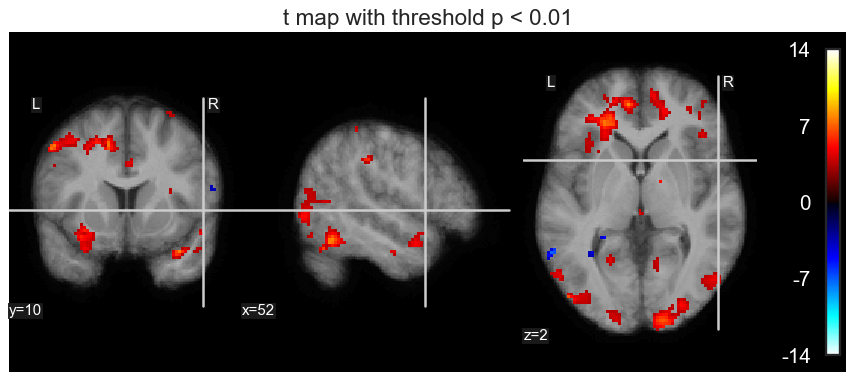

In [43]:
utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 2

Display t statistics with a corresponding p < 0.01


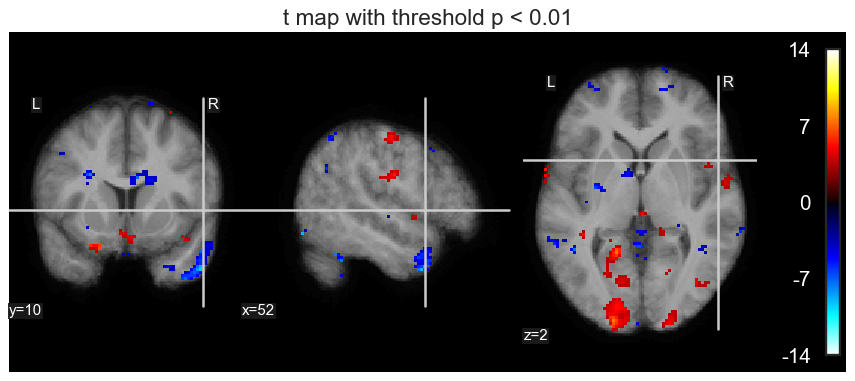

In [44]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_two), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 3

Display t statistics with a corresponding p < 0.01


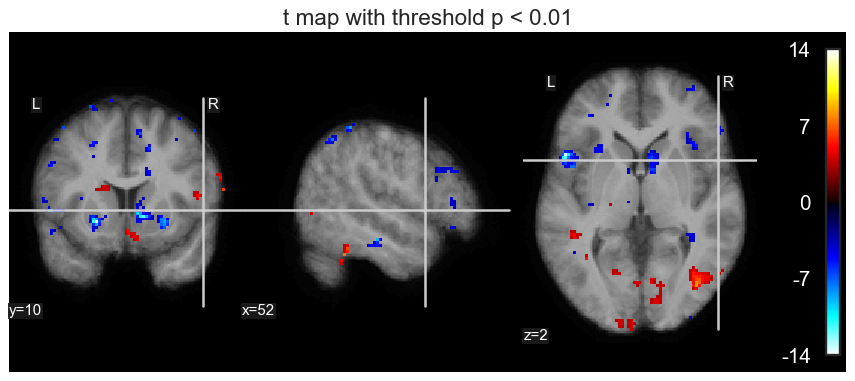

In [45]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_three), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 4

Display t statistics with a corresponding p < 0.01


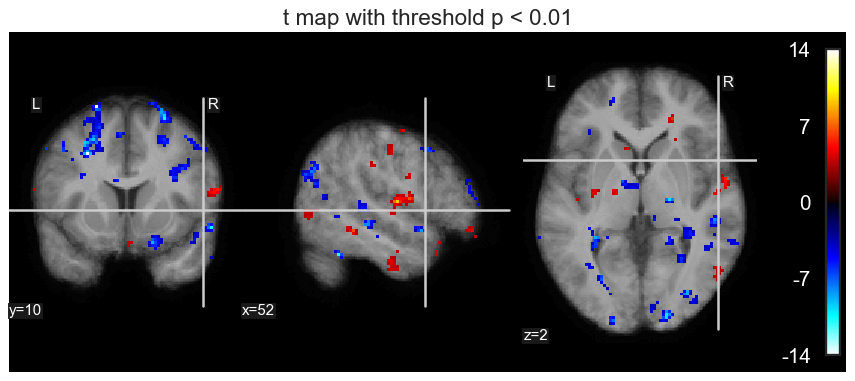

In [46]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_four), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 5

Display t statistics with a corresponding p < 0.01


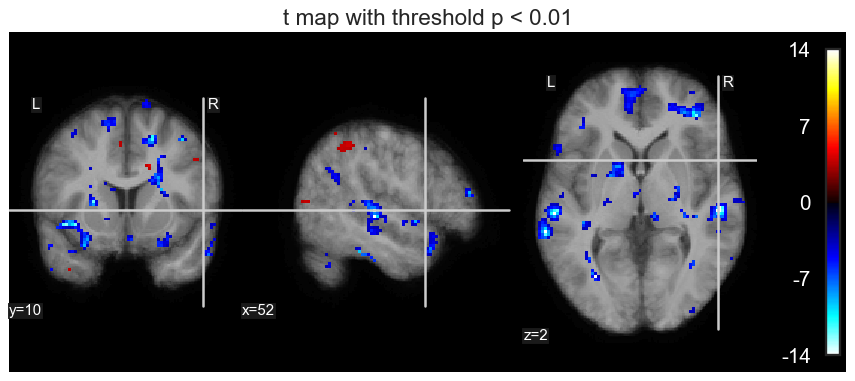

In [47]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_five), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 6

Display t statistics with a corresponding p < 0.01


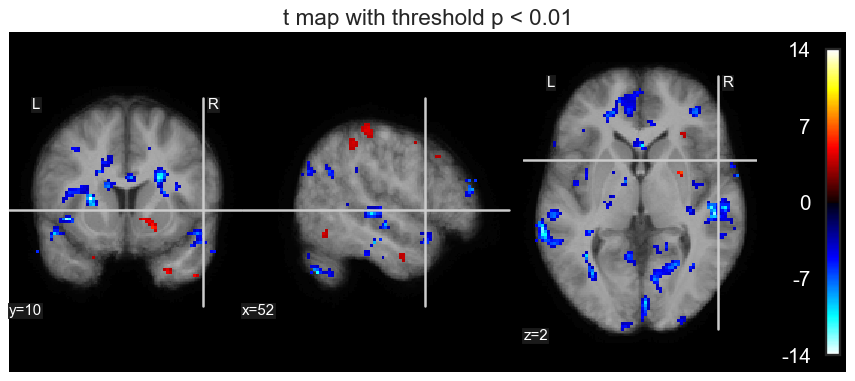

In [48]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_six), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 7

Display t statistics with a corresponding p < 0.01


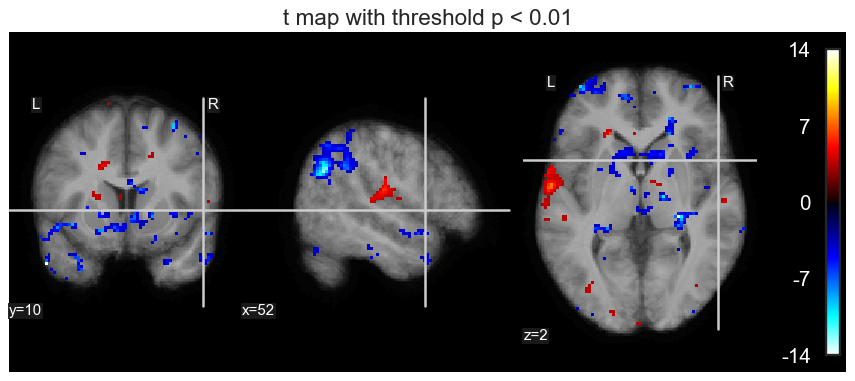

In [49]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_seven), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 8

Display t statistics with a corresponding p < 0.01


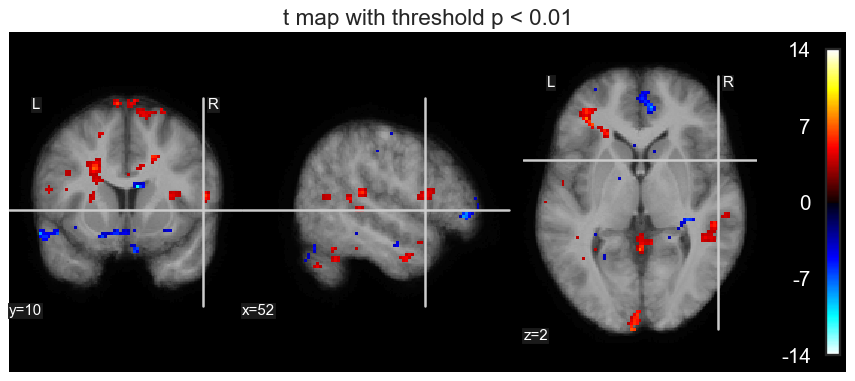

In [50]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_eight), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

## Level 9

Display t statistics with a corresponding p < 0.01


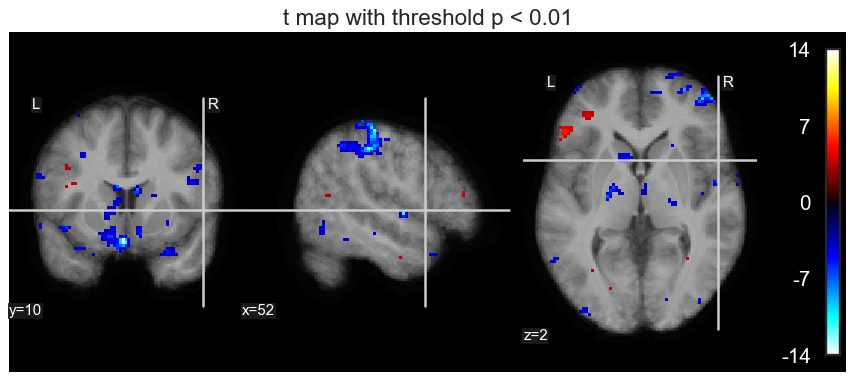

In [51]:
tstats, p = stats.ttest_1samp(np.arctanh(isc_maps_lvl_nine), popmean=0)

utils.plot_statistical_map(coords=coords_mat, 
                           tstats=tstats, 
                           pvalues=p, 
                           brain_nii=mean_nii, 
                           mask_nii=mask_nii, 
                           threshold=True,
                           theta=0.01,
                           cut_coords=[52, 10, 2],
                           vmax=14)

# 4. Pick ROIs (one particular voxel at the time) and do the isc analyses for this

[34.00]
- From the results I got earlier, you see a bunch of blobs in the statistical brain maps. 

For each of these blobs:

    Pick the top voxel (the voxel with the highest t statistic)
    Do the isc analysis like the one above but then only for that specific voxel (because that specifies the ROI)
    